## Maternal Health Risk Analysis and Classification

### 1. Problem Identification

Insufficient knowledge about maternal healthcare during and after pregnancy is a leading cause of death among pregnant women due to complications. It is essential to monitor every moment of pregnancy to ensure the healthy development of the fetus and safe delivery. Adequate care and diagnosis at the start of pregnancy can significantly reduce preventable deaths of pregnant women and newborns, particularly in rural areas.

The notebook aims to examine various factors that impact the health of pregnant women and develop a machine learning model to predict the level of health risk for pregnant women.

### 2. Import - Packages & Dataset

#### 2.1 Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### 2.2 Import Dataset

In [2]:
df = pd.read_csv('/Users/abhishekjaiswal/Downloads/MHR.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### 3. Variable Description & Identification

**df.info( )** provides a summary of df including the number of non-null values, data type, & memory usage of each column.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#### 3.1 Variable Description

There are total 7 variables, and each variables has 1014 observations. Here is the description of all variables:

1. **Age:** Any ages in years when a women during pregnant.
2. **SystolicBP:** Upper value of Blood Pressure in mmHg.
3. **DiastolicBP:** Lower value of Blood Pressure in mmHg,
4. **BS:** Blood glucose levels is in terms of a molar concentration, mmol/L.
5. **BodyTemp:** Women body temperature.
6. **HeartRate:** A normal resting heart rate in beats per minute.
7. **Risk Level:** Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Here, we have Risk Level as target variable, and the rest of the variables are predictor variables.

#### 3.2 Variable Data Types

1. **Categorical Variable:** Risk Level.
2. **Numerical Variable:** Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate.

#### 3.3 Checking Null/Missing Values

**df.isnull( ).sum( )** is a method chain used to get the count of missing or null values in each column of a DataFrame.

In [4]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

#### Observation(s):
There's no null/missing values in this dataset. Therefore, we can move on to the next step.

#### 3.4 Checking Duplicate Values

Duplication means that we have repeated data in our dataset. The reasons for duplicate values can be-
1. Data entry errors
2. Data collection methods

In [5]:
print(f"Total number of duplicates: {df.duplicated().sum()}")
df.loc[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())

Total number of duplicates: 562


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,6.0,99.0,70,mid risk
849,10,100,50,6.0,99.0,70,mid risk
552,12,90,60,7.5,102.0,60,low risk
940,12,90,60,7.5,102.0,60,low risk
543,12,90,60,7.5,102.0,66,low risk
...,...,...,...,...,...,...,...
553,60,120,85,15.0,98.0,60,mid risk
772,60,120,85,15.0,98.0,60,mid risk
818,60,120,85,15.0,98.0,60,mid risk
114,63,140,90,15.0,98.0,90,high risk


#### Observation(s):
**562 duplicate data** is a significant number. 

**Therefore what steps should we take next?** 
Duplicated data can unnecessarily increase storage space and slow down calculations. It can also lead to skewed analysis results and undermine the integrity of the dataset. Additionally, including duplicate values can result in overfitting and affect the model's performance. Hence, before proceeding to the next steps, we should examine this data to determine its distribution.

### 4. Univariate Analysis

Univariate analysis involves examining each variable in a dataset separately to determine its distribution, including its range of values and central tendency. Unlike bivariate and multivariate analysis, univariate data analysis does not consider relationships between variables, instead summarizing each variable independently.

The methods used to perform univariate analysis depend on whether the variable is categorical or numerical. For numerical variables, we typically examine the shape of their distribution, which can be symmetric or skewed, using techniques like histograms and density plots. For categorical variables, we use bar plots to visualize their absolute and proportional frequency distributions.

#### 4.1 Categorical Variables

For categorical variables, we'll just checking the frequency distribution of the data using bar plot. Another way to show the relationships between classes or categories of a variable is in a pie or circle chart. In a pie chart, each "slice" represents the proportion of the total phenomenon that is due to each of the classes or groups.

#### 4.1.1 Risk Level

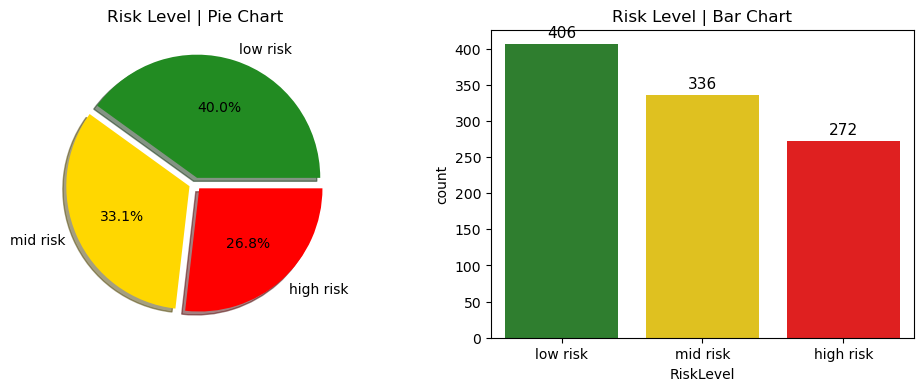

In [34]:
p_colors = ['forestgreen', 'gold', 'red']
risk_order = ["low risk", "mid risk", "high risk"]
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df["RiskLevel"].value_counts().plot(kind="pie", labels=risk_order, colors=p_colors, explode=[0.05, 0.05,  0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title("Risk Level | Pie Chart")
ax[0].set_ylabel('')

count = sns.countplot(x="RiskLevel", data=df, ax=ax[1], order=risk_order, palette=p_colors)
for bar in count.patches:
    count.annotate(format(bar.get_height()),
        (bar.get_x() + bar.get_width() / 2,
        bar.get_height()), ha='center', va='center',
        size=11, xytext=(0, 8),
        textcoords='offset points')
ax[1].set_title("Risk Level | Bar Chart")
plt.show()

#### Observation(s):
The dataset indicates that a majority of pregnant women have low health risk. Specifically, out of the 1014 observations-
1. 406 (40%) pregnant women are classified as low risk
2. 336 (33.1%) as medium risk
3. 272 (26.8%) as high risk

We aim to further examine the data to better understand why pregnant women exhibit varying levels of health risk, and investigate the variables that may affect it. This will involve analyzing each variable one by one to gain more insights.

#### 4.2 Numerical Variables

Unlike categorical variables that represent different classes/categories with only a few distinct values, numerical variables are continuous and take on a range of values. Therefore, to better understand the distribution of data for each numerical variable, we use histograms rather than bar charts. Histograms are used for interval and ratio level variables, and are similar to bar charts.

In addition to examining the distribution, it is important to identify and address outliers in numerical data. Outliers are observations that deviate significantly from the rest of the values in a random sample from a population. Non-randomly distributed outliers can negatively impact normality, skew the distribution, increase error variance, reduce the power of statistical tests, and bias or influence estimates. To identify outliers, we can use box plots to visualize continuous data. Before examining the distribution and identifying outliers, we can use the describe() function from pandas to display descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution for initial observations.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


#### Observation(s):
It appears that- Age, BS, and HeartRate variable may have outliers in it. But this is just preliminary guess. Let's explore the data deeper.

In [8]:
def num_plot(df, col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(data=df, x=col, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=col, ax=ax[1])
    ax[0].set_title(f"{col} Distribution Histogram")
    ax[1].set_title(f"{col} Distribution Boxplot")

    plt.show()

#### 4.2.1 Age

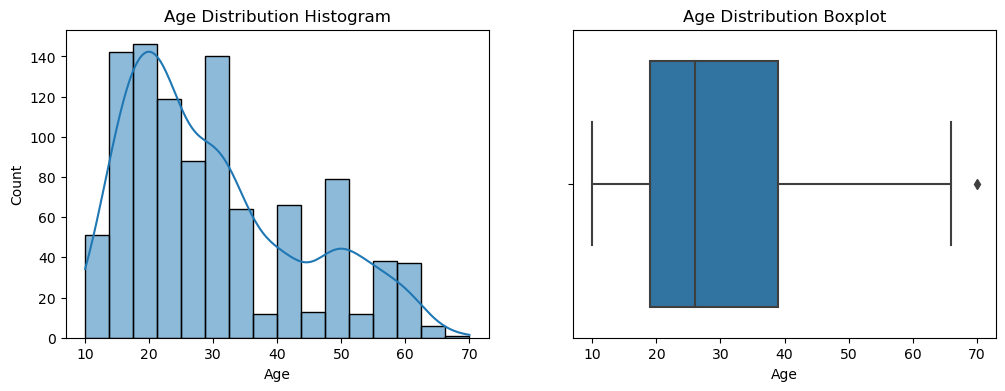

In [9]:
num_plot(df, "Age")

#### 4.2.2 SystolicBP

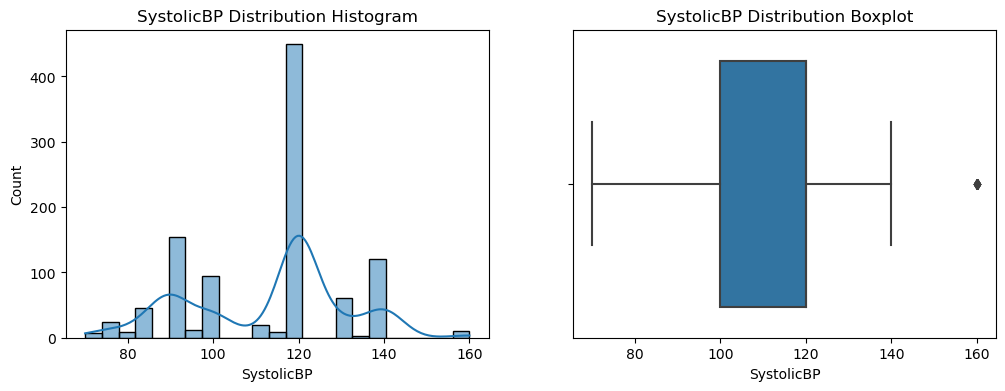

In [10]:
num_plot(df, "SystolicBP")

#### 4.2.3 DiastolicBP

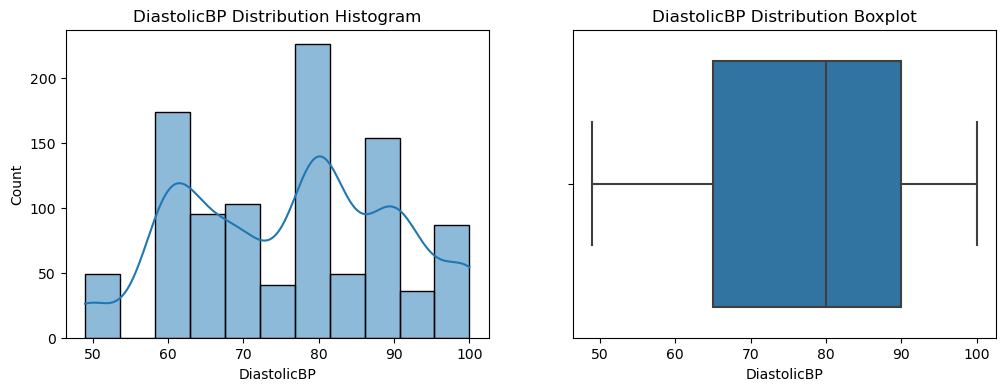

In [11]:
num_plot(df, "DiastolicBP")

#### 4.2.4 BS

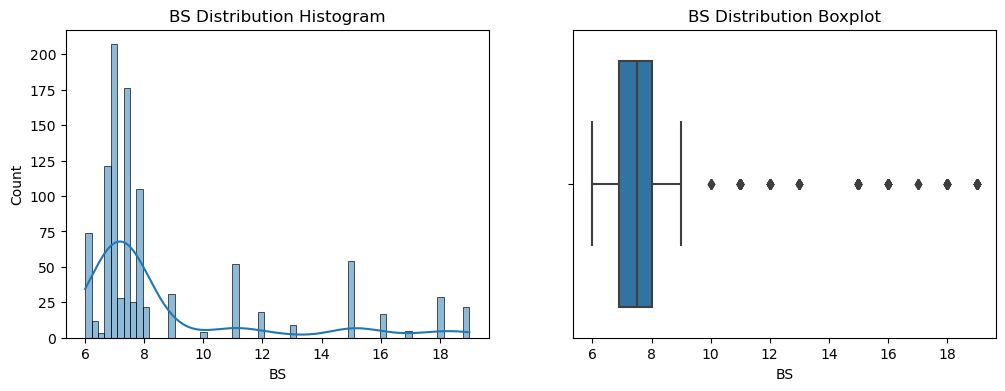

In [12]:
num_plot(df, "BS")

#### 4.2.5 BodyTemp

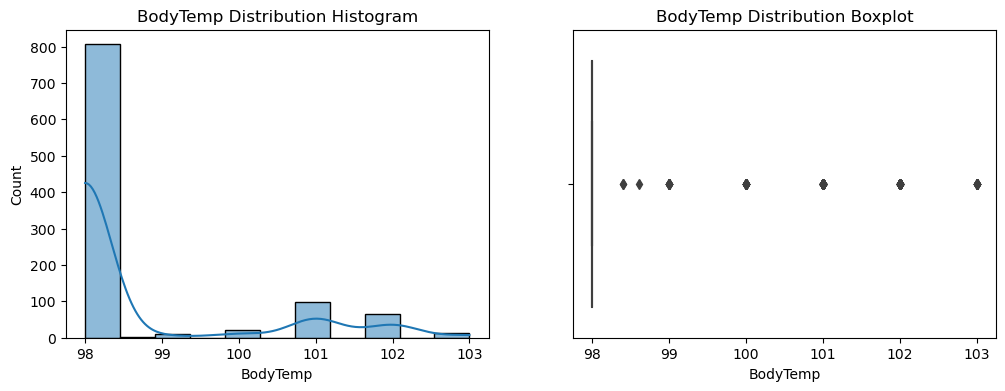

In [13]:
num_plot(df, "BodyTemp")

#### 4.2.6 HeartRate

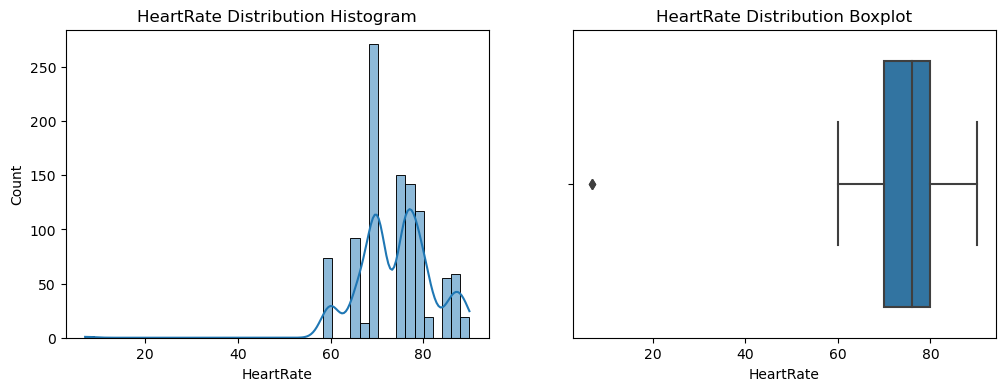

In [14]:
num_plot(df, "HeartRate")

#### Observation(s):
As we can observe- almost all variables has outlier that cause skewed distribution. For now, we will just ignore that outliers because the value seems to be a natural, except for HeartRate. HeartRate has an outlier with a value that is too far from the other values.

### 5. Bivariate Analysis
Bivariate analysis enables the examination of the interdependence between two variables and identifies any possible association and the strength of such association. The analysis involves studying one dependent variable and one independent variable. Correlation coefficients can be employed to determine the extent of the relationship between the two variables. Additionally, scatter plots can be used to illustrate the patterns that the two variables may form.

#### 5.1 Numerical Variables

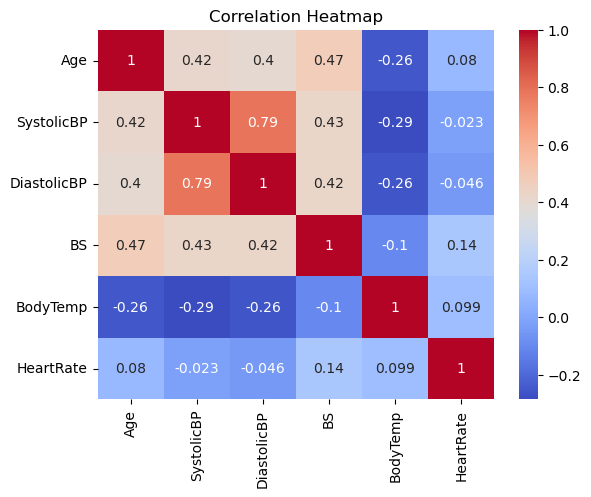

In [16]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Since we only have 6 numerical variables, we'll use pairplot here.

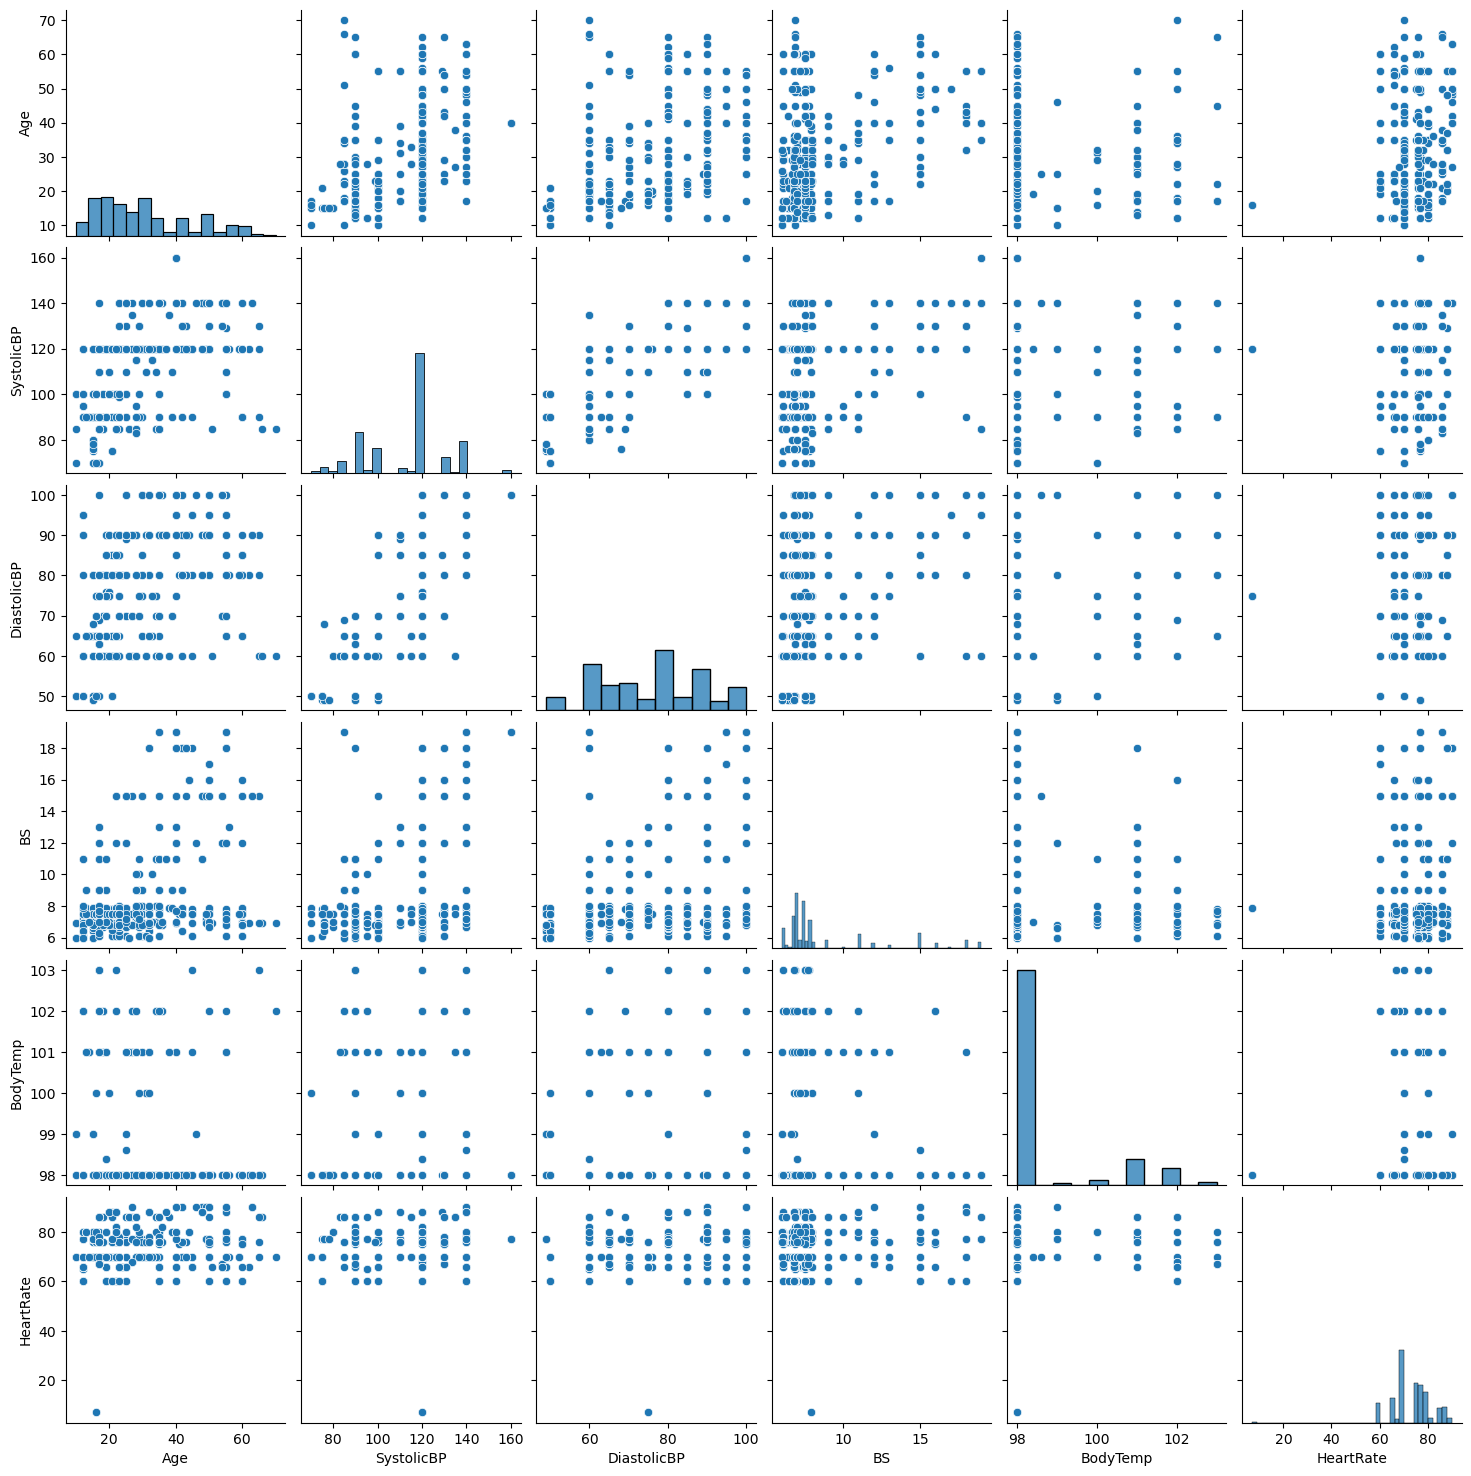

In [17]:
sns.pairplot(df)
plt.show()

#### Observation(s):
The variables SystolicBP and DiastolicBP exhibit a strong positive correlation with a correlation coefficient of 0.79, as evident from the graph. This implies that these two variables contain highly similar information and have very little or no variation in information. This issue is known as Multicollinearity, which can adversely affect the statistical significance of an independent variable. To avoid having redundant variables during model training, we may consider eliminating one of them. However, we need to investigate further to determine whether we should remove

#### 5.2 Predictor and Target
We will use histogram with hue mapping to visualize the predictor variables data distribution based on the target variable. Also, since our predictor variable only has few unique values, we can also use pandas crosstab to see the detailed values.

#### 5.2.1 Age → RiskLevel

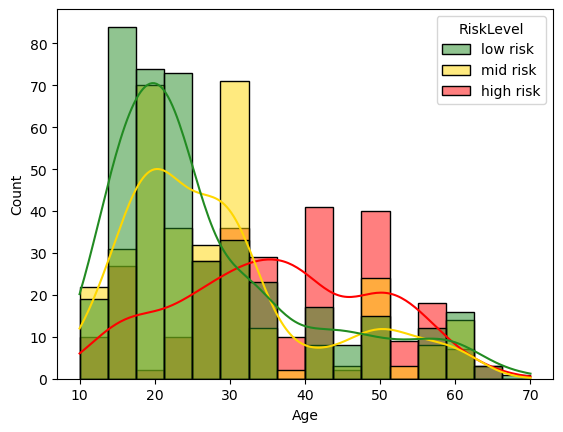

In [35]:
sns.histplot(data=df, x="Age", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [19]:
pd.crosstab(df.RiskLevel, df.Age).style.background_gradient(cmap='summer_r')

Age,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,54,55,56,59,60,62,63,65,66,70
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,7,3,3,0,0,24,0,2,0,0,5,5,0,21,0,2,5,8,10,0,18,2,3,22,2,6,2,2,34,0,4,3,0,1,1,16,2,22,0,9,17,1,0,7,0,2,1,0,0
low risk,2,15,2,0,56,10,18,8,28,11,27,28,42,3,16,0,5,7,2,6,7,18,0,2,21,0,0,0,0,1,1,15,0,0,8,0,4,5,5,1,0,12,0,2,13,1,0,2,1,1
mid risk,2,13,7,0,4,6,21,11,37,11,11,12,24,0,11,3,2,16,30,14,15,12,3,0,7,2,0,0,2,2,0,4,2,3,0,0,6,2,16,0,3,8,0,0,14,0,0,0,0,0


#### Observation(s):

1. Pregnant women aged below 24 years mostly has low health risk.
2. Health risks will start to increase after that age (starting from the age of 25 years).
3. Surprisingly, the health risk of pregnant women over 59 years old is decreased.

#### 5.2.2 SystolicBP → RiskLevel

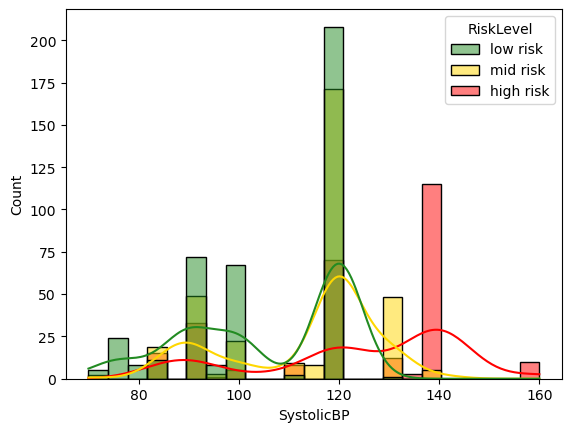

In [36]:
sns.histplot(data=df, x="SystolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [22]:
pd.crosstab(df.RiskLevel, df.SystolicBP).style.background_gradient(cmap='summer_r')

SystolicBP,70,75,76,78,80,83,85,90,95,99,100,110,115,120,129,130,135,140,160
RiskLevel,,,,,,,,,,,,,,,,,,,
high risk,0,0,0,0,0,2,13,33,1,0,5,8,0,70,0,12,3,115,10
low risk,5,8,16,3,5,0,11,72,8,2,65,2,0,208,1,0,0,0,0
mid risk,2,0,0,0,0,0,19,49,3,0,22,9,8,171,0,48,0,5,0


#### Observation(s):

1. Pregnant women with upper value of blood pressure >= 100 mmHg mostly has low health risk.
2. The higher pregnant women's blood pressure, the higher the health risk

#### 5.2.3 DiastolicBP → RiskLevel

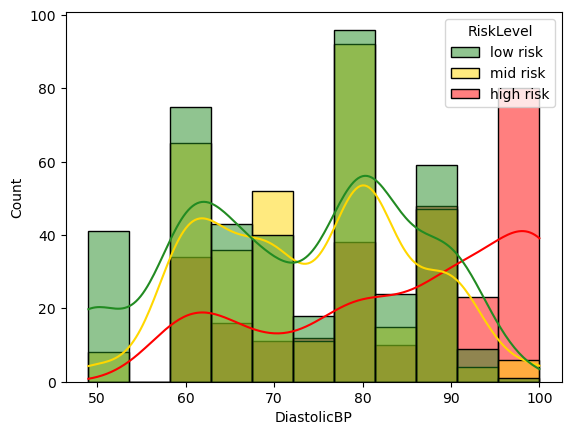

In [37]:
sns.histplot(data=df, x="DiastolicBP", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [24]:
pd.crosstab(df.RiskLevel, df.DiastolicBP).style.background_gradient(cmap='summer_r')

DiastolicBP,49,50,60,63,65,68,69,70,75,76,80,85,89,90,95,100
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,0,34,2,14,0,1,10,12,0,38,10,0,48,23,80
low risk,25,16,75,2,41,2,0,38,15,3,96,24,1,58,9,1
mid risk,0,8,65,4,32,0,0,52,11,0,92,15,0,47,4,6


#### Observation(s):

This variable has pretty similar pattern as SystolicBP. This is not surprising since they're highly correlated.

#### 5.2.4 BS → RiskLevel

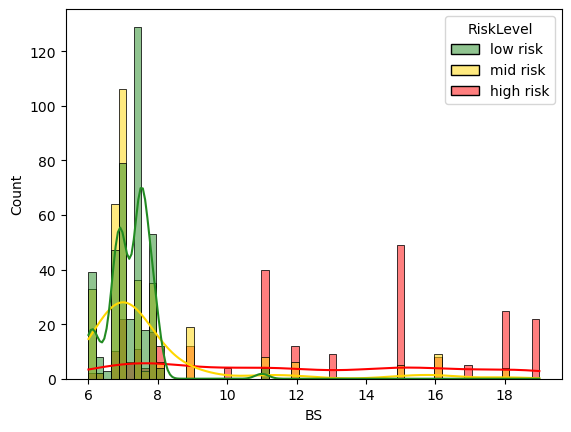

In [38]:
sns.histplot(data=df, x="BS", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [27]:
pd.crosstab(df.RiskLevel, df.BS).style.background_gradient(cmap='summer_r')

BS,6.000000,6.100000,6.300000,6.400000,6.500000,6.600000,6.700000,6.800000,6.900000,7.000000,7.010000,7.100000,7.200000,7.500000,7.600000,7.700000,7.800000,7.900000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,15.000000,16.000000,17.000000,18.000000,19.000000
RiskLevel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high risk,0,2,2,0,0,0,0,10,8,9,5,0,6,11,0,4,5,12,12,12,4,40,12,9,49,8,5,25,22
low risk,7,32,0,8,1,2,10,37,47,29,3,8,14,129,1,17,19,34,4,0,0,4,0,0,0,0,0,0,0
mid risk,14,19,0,2,0,0,23,41,58,41,7,0,0,36,0,3,21,14,6,19,0,8,6,0,5,9,0,4,0


#### Observation(s):

1. Almost every pregnant women with blood glucose level >= 8 has high health risk.
2. But otherwise, they seems to have lower health risk with blood glucose < 8

#### 5.2.5 BodyTemp → RiskLevel

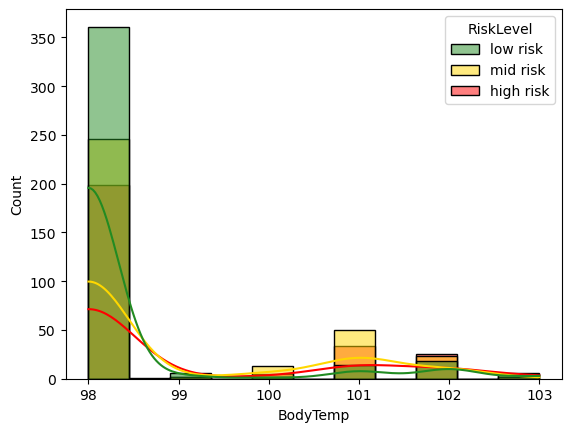

In [39]:
sns.histplot(data=df, x="BodyTemp", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [29]:
pd.crosstab(df.RiskLevel, df.BodyTemp).style.background_gradient(cmap='summer_r')

BodyTemp,98.000000,98.400000,98.600000,99.000000,100.000000,101.000000,102.000000,103.000000
RiskLevel,,,,,,,,
high risk,199,0,1,2,5,34,25,6
low risk,359,2,0,6,2,14,18,5
mid risk,246,0,0,2,13,50,23,2


#### Observation(s):

1. Most pregnant women seem to have a body temperature of 98 F, which is normal body temperature
2. Pregnant women with body temperature >= 100 mostly has higher health risk

#### 5.2.6 HeartRate → RiskLevel

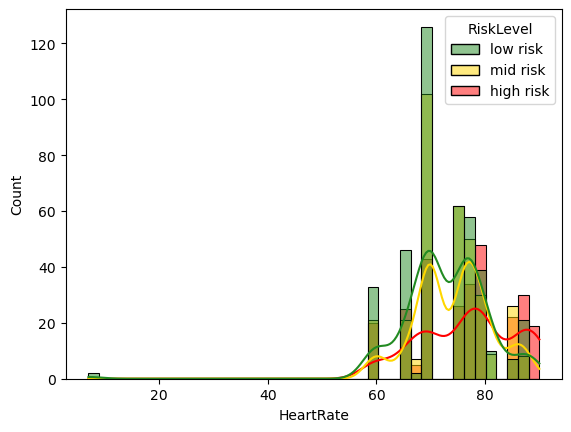

In [40]:
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", kde=True, hue_order=risk_order, palette=p_colors)
plt.show()

In [31]:
pd.crosstab(df.RiskLevel, df.HeartRate).style.background_gradient(cmap='summer_r')

HeartRate,7,60,65,66,67,68,70,75,76,77,78,80,82,86,88,90
RiskLevel,,,,,,,,,,,,,,,,
high risk,0,20,0,25,5,0,43,6,20,25,9,48,0,22,30,19
low risk,2,33,2,44,2,0,126,7,55,56,2,39,10,7,21,0
mid risk,0,21,3,18,5,2,102,6,56,15,35,30,9,26,8,0


#### Observation(s):

1. As i mentioned before, HeartRate variable has outlier that with a value that looks unnatural, which is 6 bpm.
2. Health risks seem to be getting higher along with the number of heart rate.

### 6. Multivariate Analysis
To conduct multivariate analysis, we examine the relationships between multiple variables, typically more than two, to determine any potential associations and correlations. Specifically, we aim to identify the relationship between one or more predictor variables and a response variable.

In this scenario, we will be examining the influence of two distinct predictor variables on the RiskLevel variable. We will employ a scatter plot to visualize the numerical values of our predictor variables and group them by RiskLevel using different colors.

#### 6.1 Age and SystolicBP → RiskLevel

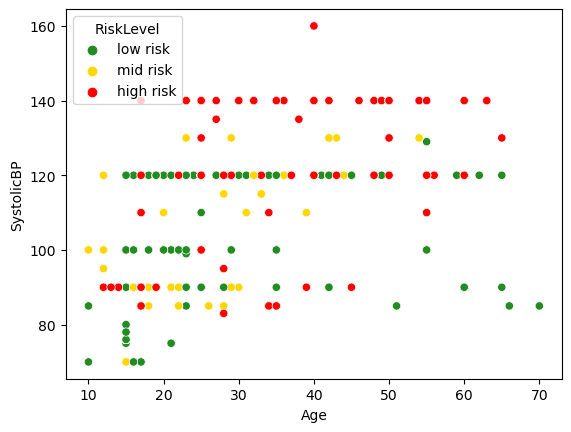

In [41]:
sns.scatterplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Pregnant women with high SystolicBP seems to have a high health risk, regardless of their age.
2. Having low SystolicBP at a young age (under 50 years) doesn't guarantee does not guarantee our health risk is low, 3. but it seems to have it in old age makes our health risks lower.

#### 6.2 Age and DiastolicBP → RiskLevel

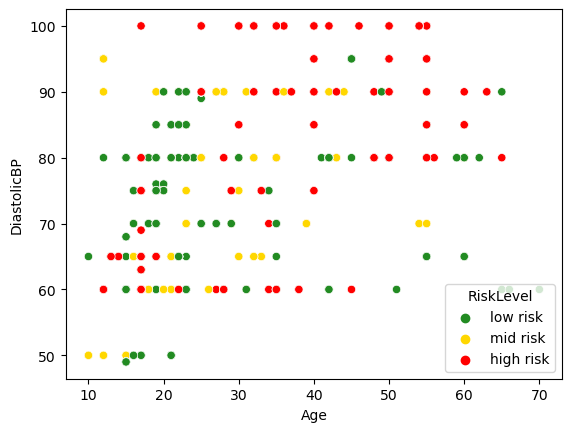

In [42]:
sns.scatterplot(data=df, x="Age", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

- We can see the same pattern as before, since SystolicBP and DiastolicBP are highly correlated

#### 6.3 Age and BS → RiskLevel

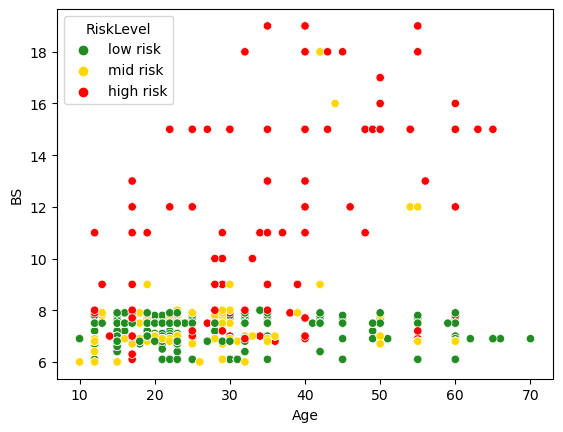

In [43]:
sns.scatterplot(data=df, x="Age", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

- Pregnant women with high blood glucose level seems to have a high health risk, regardless of their age.

#### 6.4 Age and BodyTemp → RiskLevel

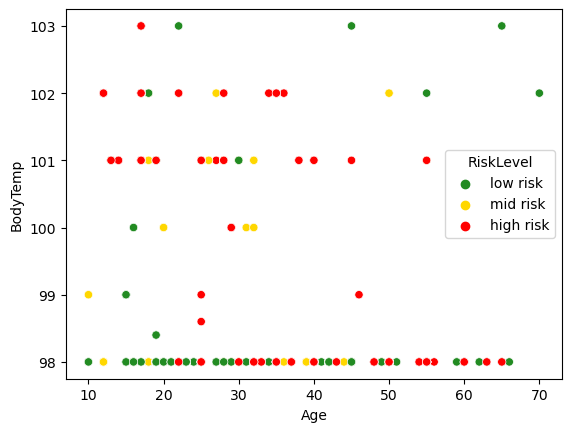

In [44]:
sns.scatterplot(data=df, x="Age", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Younger women with normal body temperature mostly have low health risk, but they'll have higher risk if they have high body temperature.
2. High body temperature for older women doesn't doesn't appear to significantly affect their health risks

#### 6.5 Age and HeartRate → RiskLevel

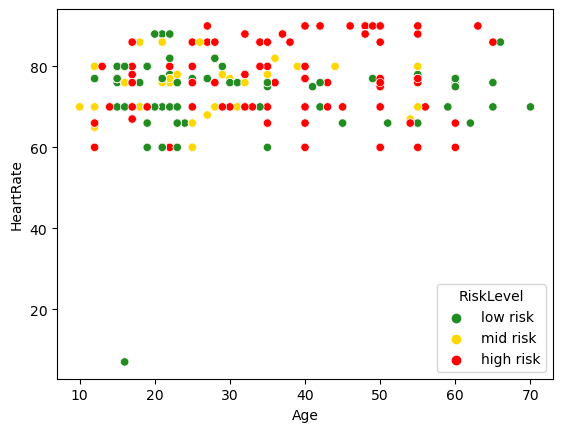

In [45]:
sns.scatterplot(data=df, x="Age", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

- It seems that heart rate has less effect on pregnant women's health risk compared to age.

#### 6.6 SystolicBP and DiastolicBP → RiskLevel

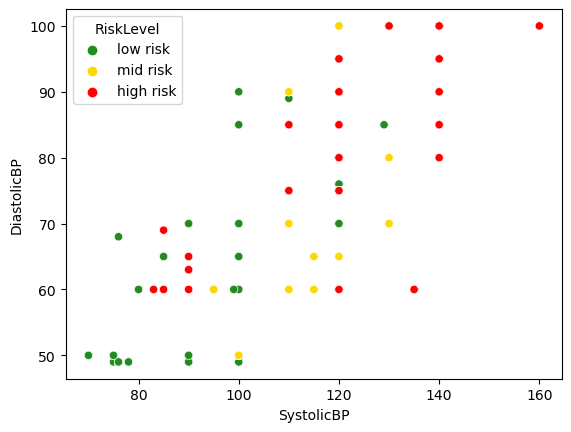

In [46]:
sns.scatterplot(data=df, x="SystolicBP", y="DiastolicBP", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Apparently, pregnant women with lower SystolicBP and DiastolicBP seems to have a lower health risk.
2. But otherwise, the higher SystolicBP and DiastolicBP they have, the higher their health risk.

#### 6.7 SystolicBP and BS → RiskLevel

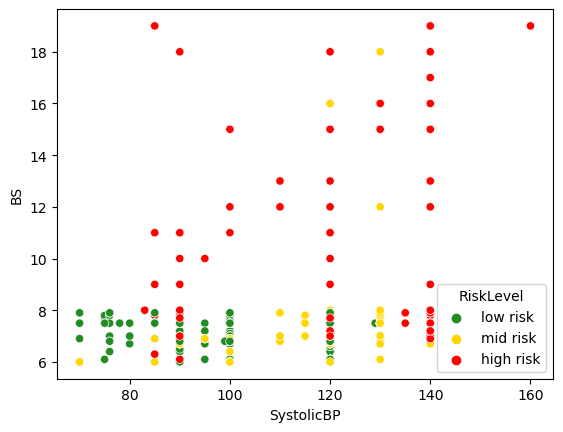

In [47]:
sns.scatterplot(data=df, x="SystolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. We can see almost similar pattern as before.
2. However, a higher BS value seems to affect the health risks of pregnant women more.

#### 6.8 SystolicBP and BodyTemp → RiskLevel

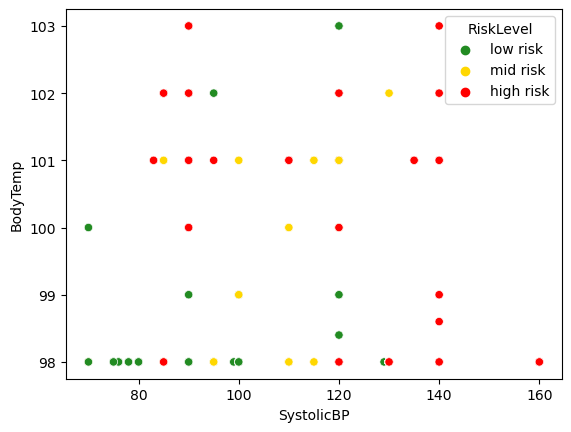

In [68]:
sns.scatterplot(data=df, x="SystolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Pregnant women with normal body temperature and low SystolicBP mostly has low health risk.
2. But the one who has high SystolicBP seems to have higher health risk, regardless of their body temperature.

#### 6.9 SystolicBP and HeartRate → RiskLevel

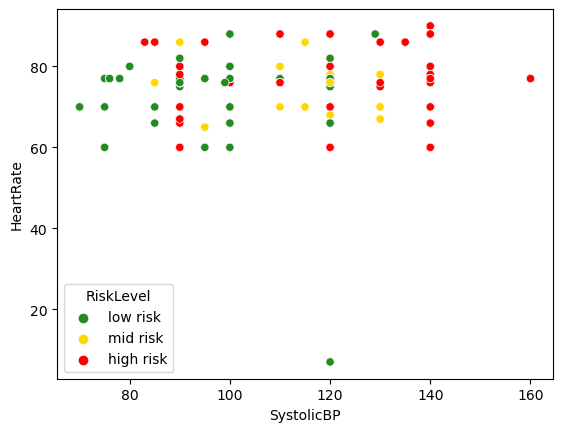

In [48]:
sns.scatterplot(data=df, x="SystolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. HeartRate value seems has less effect on pregnant women's health risk compared to SystolicBP.
2. Looks like HeartRate variabel isn't really useful.

#### 6.10 DiastolicBP and BS → RiskLevel

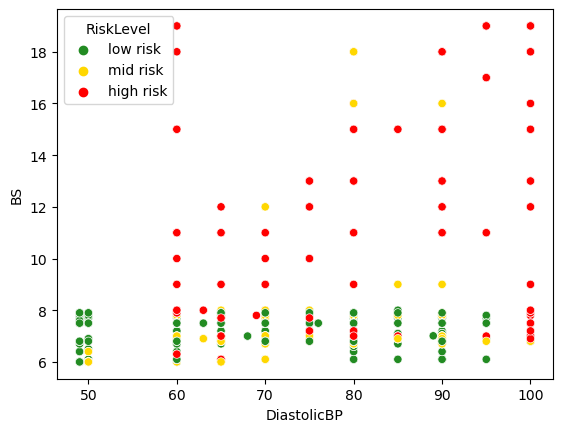

In [49]:
sns.scatterplot(data=df, x="DiastolicBP", y="BS", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

- Pregnant women with high blood glucose level has higher health risk, regardless of their DiastolicBP.

#### 6.11 DiastolicBP and BodyTemp → RiskLevel

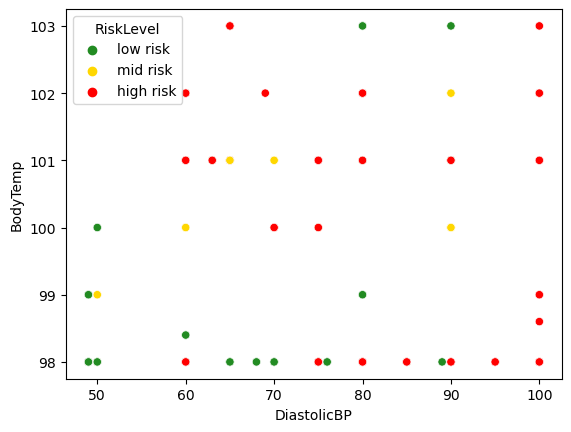

In [69]:
sns.scatterplot(data=df, x="DiastolicBP", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

- Pregnant women with low DiastolicBP and low body temperature mostly has low health risk, but their health risk will get higher if they have higher body temperature.

#### 6.12 DiastolicBP and HeartRate → RiskLevel

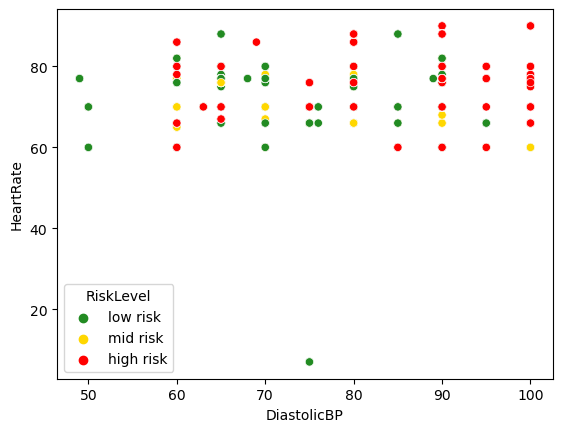

In [70]:
sns.scatterplot(data=df, x="DiastolicBP", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Again, HeartRate value seems has less effect on pregnant women's health risk compared to DiastolicBP.
2. Looks like HeartRate variabel isn't really useful.

#### 6.13 BS and BodyTemp → RiskLevel

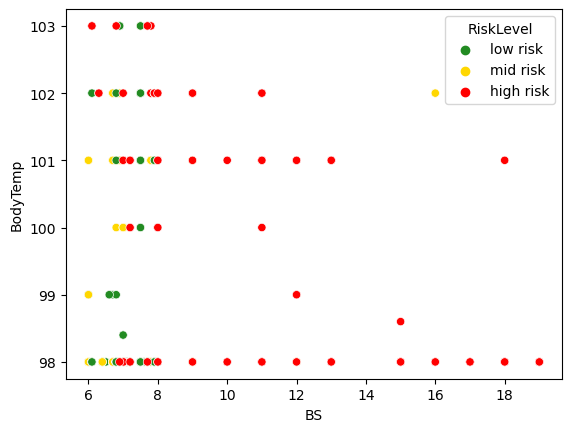

In [71]:
sns.scatterplot(data=df, x="BS", y="BodyTemp", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):
- Pregnant women with high blood glucose level seems to have a high health risk, regardless of their body temperature.

#### 6.14 BS and HeartRate → RiskLevel

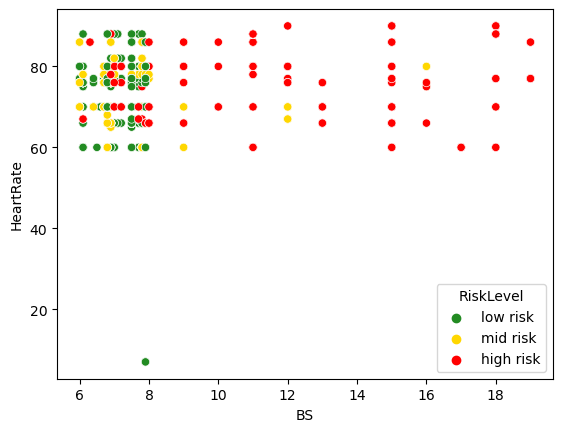

In [52]:
sns.scatterplot(data=df, x="BS", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):
- Apparently, Pregnant women with higher blood glucose level seems to have a higher health risk, regardless of their heart rate.

#### 6.15 BodyTemp and HeartRate → RiskLevel

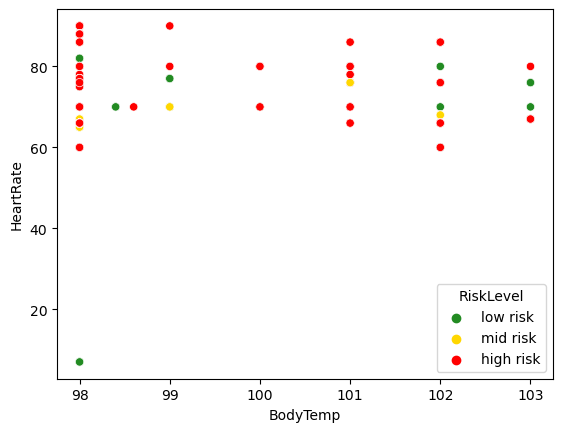

In [53]:
sns.scatterplot(data=df, x="BodyTemp", y="HeartRate", hue="RiskLevel", hue_order=risk_order, palette=p_colors)
plt.show()

#### Observation(s):

1. Pregnant women with higher body temperature seems to have a higher health risk, regardless of their heart rate (please note that according to previous analysis, pregnant women in this obervation mostly has 98 F body temperature).
2. HeartRate variable really isn't helpful in this case.

### 7. Feature Engineering and Data Cleaning

### 7.1 Outlier Handling
Based on our previous analysis of the dataset, it was observed that several variables contained outliers. However, it was noted that most of these values still appeared reasonable in real-life contexts. The exception to this was the HeartRate variable, which contained two observations with an unreasonable value of 7 bpm (beats per minute). As a normal resting heart rate for adults ranges from 60 to 100 beats per minute, and the lowest recorded resting heart rate in human history was 25 bpm, it was determined that these two records with the heart rate value of 7 were likely due to input errors. Therefore, we have decided to drop these records to avoid any further inconsistencies.

To maintain a record of the original data, we will store the processed data in a new variable, which can be compared to the original data.

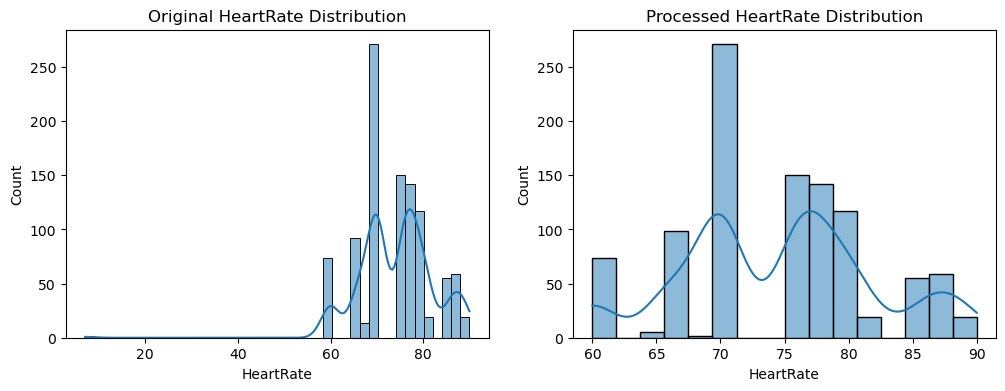

In [56]:
data_proc = df.drop(df.index[df.HeartRate == 7])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df, x="HeartRate", kde=True, ax=ax[0])
sns.histplot(data=data_proc, x="HeartRate", kde=True, ax=ax[1])
ax[0].set_title("Original HeartRate Distribution")
ax[1].set_title("Processed HeartRate Distribution")
plt.show()

#### 7.2 Removing Irrelevant Features

Based on multiple analyses of the predictor variables, it has been determined that the HeartRate variable provides limited assistance in determining the health risks of pregnant women. Therefore, it is deemed safe to exclude this variable from the analysis.

In [57]:
data_proc = data_proc.drop(["HeartRate"], axis=1)

One might wonder why we have dropped the records with outliers on the HeartRate variable, given that we intend to remove this variable altogether. The reason for doing so is that these records likely contain input errors, making them unreliable. Additionally, the labeling of these records may also be incorrect, which could mislead the training process and compromise the accuracy of the model.

### 8. Model Building

#### 8.1 Splitting Dataset
We will split our dataset into 80% train data and 20% test data.

In [101]:
# Original Dataset
X = df.drop("RiskLevel", axis=1)
y = df.RiskLevel
x_train, x_test, y_train, y_test = split(X, y, test_size=0.25, random_state=1)

# Processed Dataset
X_proc = data_proc.drop("RiskLevel", axis=1)
y_proc = data_proc.RiskLevel
x_train_proc, x_test_proc, y_train_proc, y_test_proc = split(X_proc, y_proc, test_size=0.2, random_state=1)

print(f"Original data has {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")
print(f"Processes data has {x_train_proc.shape[0]} train data and {x_test_proc.shape[0]} test data")

Original data has 760 train data and 254 test data

Processes data has 809 train data and 203 test data


#### 8.2 Building Classification Model
For this project, we have decided to employ the Random Forest algorithm to construct our model. The Random Forest method comprises multiple decision trees, each representing a distinct instance of data input classification. By considering the instances individually, the Random Forest technique selects the prediction with the highest number of votes. This approach enables weakly correlated classifiers to be combined into a strong classifier.

We have chosen the Random Forest algorithm because it is among the most accurate learning algorithms available, and it has a fast training time. Moreover, Random Forest can be applied to datasets that have feature values with varying scales, eliminating the need for normalization or feature scaling.

In [106]:
# Using original dataset
rf = RandomForestClassifier(random_state=100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f"Original Dataset Accuracy: {accuracy_score(y_test, y_pred)}")

# Using processed dataset
rf2 = RandomForestClassifier(random_state=100)
rf2.fit(x_train_proc, y_train_proc)
y_pred = rf2.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Original Dataset Accuracy: 0.8582677165354331
Processed Dataset Accuracy: 0.8916256157635468


#### Observation(s):

Great news! Our processed dataset has resulted in a 2.46% increase in test data accuracy for our model. This improvement indicates that our model is better able to generalize to new, unseen data with our processed dataset. Additionally, Random Forest offers various hyperparameters that we can tweak to further enhance the generalization ability of our model.

#### 8.3 Hyperparameter Tuning
Our next step is to adjust two of the parameters in the Random Forest algorithm, namely n_estimators and criterion. The parameter n_estimators specifies the number of trees in the forest, while criterion determines the function used to measure the quality of a split. To achieve this, we will implement GridSearchCrossValidation with a 10-fold cross-validation technique.

In [107]:
params = {
    "n_estimators": [10, 20, 50, 100],
    "criterion": ["gini", "entropy"]
}
rf = RandomForestClassifier(random_state=100)
grid = GridSearchCV(rf, params, cv=10)
grid.fit(x_train_proc, y_train_proc)
print("Best hyperparameter:", grid.best_params_)

Best hyperparameter: {'criterion': 'gini', 'n_estimators': 50}


In [108]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score")[["params", "mean_test_score", "rank_test_score"]]

,params,mean_test_score,rank_test_score
2,"{'criterion': 'gini', 'n_estimators': 50}",0.831867,1
3,"{'criterion': 'gini', 'n_estimators': 100}",0.830648,2
7,"{'criterion': 'entropy', 'n_estimators': 100}",0.828179,3
6,"{'criterion': 'entropy', 'n_estimators': 50}",0.828164,4
1,"{'criterion': 'gini', 'n_estimators': 20}",0.823241,5
5,"{'criterion': 'entropy', 'n_estimators': 20}",0.822006,6
4,"{'criterion': 'entropy', 'n_estimators': 10}",0.818210,7
0,"{'criterion': 'gini', 'n_estimators': 10}",0.808302,8


In [109]:
y_pred = grid.predict(x_test_proc)
print(f"Processed Dataset Accuracy: {accuracy_score(y_test_proc, y_pred)}")

Processed Dataset Accuracy: 0.9014778325123153


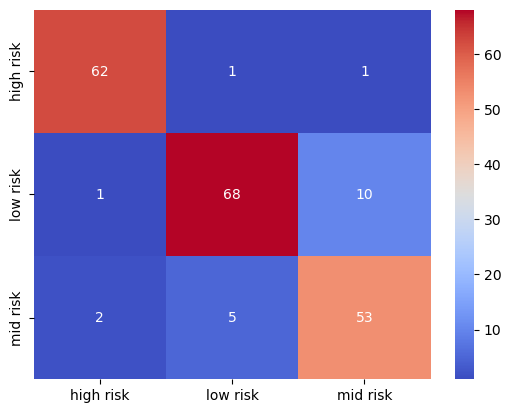

In [77]:
labels = np.unique(y_pred)
sns.heatmap(confusion_matrix(y_test_proc, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap="coolwarm")
plt.show()

#### Observation(s):
After performing hyperparameter tuning, we have determined that the optimal values for criterion and n_estimators are 'gini' and 50, respectively. By incorporating these parameter values into our model, we have observed an increase in accuracy of almost 1% on the test data. Although this improvement may seem small, it is still a noteworthy enhancement to the resulting model.

### 9. Conclusion
Upon analyzing the dataset, we can infer that the most crucial variable in determining the health of pregnant women is the blood glucose level (BS). Those with high BS levels have a greater likelihood of experiencing health complications, with over 75% of those with BS levels of 8 or above being at high risk. Additionally, BS has a relatively strong positive correlation with Age, SystolicBP, and DiastolicBP, so pregnant women with high values in these variables should exercise caution. Age is also an important factor, as the health risks for pregnant women seem to increase after the age of 25. While SystolicBP and DiastolicBP are highly related, with a correlation coefficient of 0.79. BodyTemp does not provide much information, as more than 79% of the values are 98F. However, we can infer that pregnant women with a body temperature above 98.4F are more susceptible to health risks. Finally, HeartRate is the least relevant variable in determining the health of pregnant women.

We can build a classification model for this dataset using the Random Forest algorithm. The initial accuracy we obtained with the original dataset was 86.7%. However, after conducting feature engineering and data cleaning, including removing outliers and deleting irrelevant variables, the accuracy increased to 89.16%, indicating better generalization with our processed dataset. By performing hyperparameter tuning to obtain the best hyperparameters for the Random Forest algorithm, we achieved an accuracy of 90.15%, demonstrating the model's ability to produce even higher accuracy.